# Neural Network Regression Problem (DL Assignment_3)

In [1]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.7 MB/s eta 0:00:00


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow_addons.metrics import RSquare
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


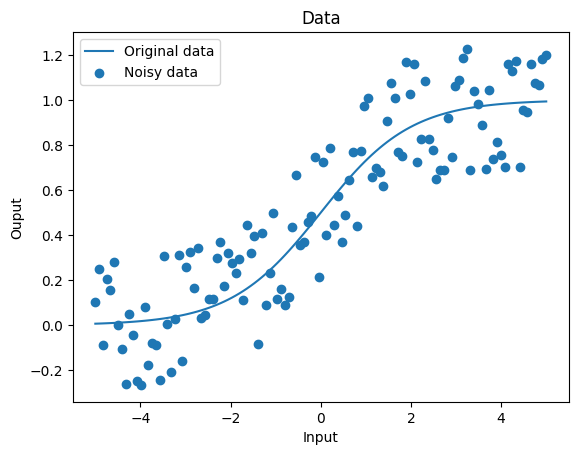

((72,), (48,), (72,), (48,))

In [3]:
n=120 # number of points
x = np.linspace(-5,5,n)            #input data
Y = (1/(1+(np.exp(-x))))  #Output data
random_numbers = np.random.uniform(-0.3, 0.3, n)  #random noise
Y_noise = Y + random_numbers  #Noisy data

#plot original data and noisy data before  NN
plt.plot(x,Y, label='Original data')
plt.scatter(x,Y_noise,label='Noisy data')
plt.title('Data')
plt.ylabel('Ouput')
plt.xlabel('Input')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [4]:
initalizer1 = keras.initializers.GlorotNormal
initalizer2 = keras.initializers.HeNormal

In [5]:
nodes = [2**i for i in range(5,10)]

def optimizing_nodes(i):
    tf.random.set_seed(42)
    model1 = Sequential()
    model1.add(Dense(nodes[i], activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
    model1.add(Dense(nodes[i], activation="relu", kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu",kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu",kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu",kernel_initializer=initalizer2))
    model1.add(Dense(1, name='output'))


    # compile and train model
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
    history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)

    return model1

train_mse = []
test_mse = []

for i in range(len(nodes)):
    tf.keras.backend.clear_session()
    model1 = optimizing_nodes(i)  # Capture the returned model
    y_pred_train = np.array(model1.predict(X_train)).flatten()
    train_error = (y_train - y_pred_train)
    train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
    train_mse.append(train_mse1)
    print(train_mse1)

    y_pred_test = np.array(model1.predict(X_test)).flatten()
    test_error = (y_test - y_pred_test)
    test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
    test_mse.append(test_mse1)


Epoch 1/200
2/2 [==============================] - 2s 258ms/step - loss: 5.3239 - mean_absolute_percentage_error: 2320.9814 - val_loss: 2.5022 - val_mean_absolute_percentage_error: 27726.3730
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 2.3199 - mean_absolute_percentage_error: 1634.6909 - val_loss: 1.2139 - val_mean_absolute_percentage_error: 17795.5430
Epoch 3/200
2/2 [==============================] - 0s 37ms/step - loss: 1.1026 - mean_absolute_percentage_error: 915.1797 - val_loss: 0.7257 - val_mean_absolute_percentage_error: 8595.9873
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6222 - mean_absolute_percentage_error: 516.4514 - val_loss: 0.4395 - val_mean_absolute_percentage_error: 528.5645
Epoch 5/200
2/2 [==============================] - 0s 52ms/step - loss: 0.3600 - mean_absolute_percentage_error: 121.4783 - val_loss: 0.3242 - val_mean_absolute_percentage_error: 6178.8027
Epoch 6/200
2/2 [==============================] - 

In [ ]:
plt.subplot()
plt.plot(nodes,train_mse,marker='*',label='Training Error')
plt.plot(nodes,test_mse, marker='o',label = 'Testing Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Square Error')
#plt.xticks(range(0,10,1))
plt.title("Training and Testing Error vs Number of Nodes")
plt.legend()
plt.show()

2/2 [==============================] - 0s 7ms/step


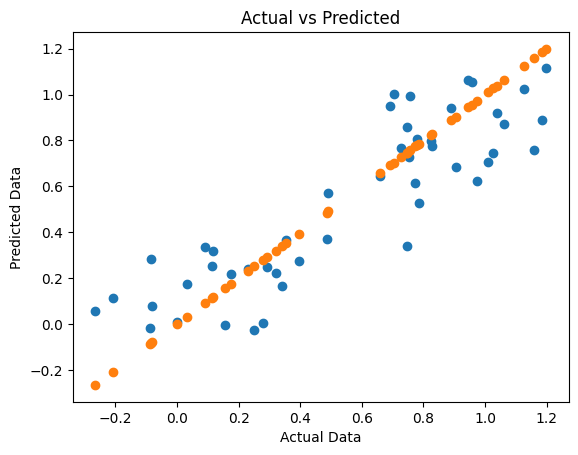

In [7]:
ytest_p = model1.predict(X_test)
plt.scatter(y_test,ytest_p, label='predicted Data')
plt.scatter(y_test,y_test, label='actual')
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual vs Predicted")
plt.show()

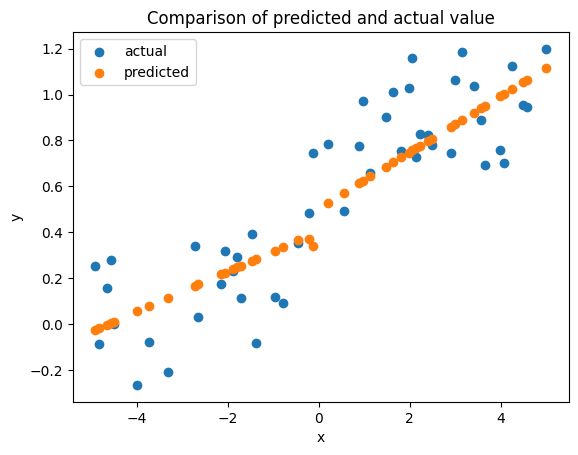

In [8]:
plt.scatter(X_test,y_test, label='actual')
plt.scatter(X_test,ytest_p, label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of predicted and actual value')
plt.legend()
plt.show()

In [9]:


n = [120, 240, 480, 960, 1920, 3840]

train_mse = []
test_mse = []

for i in range(len(n)):
    x = np.linspace(-5, 5, n[i])            # input data
    Y = 1/(1+np.exp(-x))                  # Output data
    random_numbers = np.random.uniform(-0.2, 0.2, n[i])  # random noise
    Y_noise = Y + random_numbers           # Noisy data
    X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape

    # Resetting the model for each iteration
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(256, activation="relu", input_dim=1, name='hidden_1'))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(1, name='output'))

    # compile and train model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)

    y_pred_train = np.array(model.predict(X_train)).flatten()
    train_error = (y_train - y_pred_train)
    train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
    train_mse.append(train_mse1)
    print(train_mse1)

    y_pred_test = np.array(model.predict(X_test)).flatten()
    test_error = (y_test - y_pred_test)
    test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
    test_mse.append(test_mse1)


Epoch 1/200
3/3 [==============================] - 1s 106ms/step - loss: 0.2978 - mean_absolute_percentage_error: 331.4429 - val_loss: 0.0725 - val_mean_absolute_percentage_error: 79.4843
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1162 - mean_absolute_percentage_error: 187.7029 - val_loss: 0.2651 - val_mean_absolute_percentage_error: 82.1430
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1623 - mean_absolute_percentage_error: 148.9009 - val_loss: 0.2143 - val_mean_absolute_percentage_error: 218.9624
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 0.1282 - mean_absolute_percentage_error: 301.8462 - val_loss: 0.0711 - val_mean_absolute_percentage_error: 150.6673
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0714 - mean_absolute_percentage_error: 140.2469 - val_loss: 0.0590 - val_mean_absolute_percentage_error: 72.1354
Epoch 6/200
3/3 [==============================] - 0s 21ms/ste

12/12 [==============================] - 0s 2ms/step
0.012719279391904934
3/3 [==============================] - 0s 4ms/step
Epoch 1/200
20/20 [==============================] - 1s 13ms/step - loss: 0.1087 - mean_absolute_percentage_error: 143.9584 - val_loss: 0.0579 - val_mean_absolute_percentage_error: 215.5917
Epoch 2/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_absolute_percentage_error: 114.1014 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 187.6252
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0195 - mean_absolute_percentage_error: 122.5516 - val_loss: 0.0185 - val_mean_absolute_percentage_error: 173.7910
Epoch 4/200
20/20 [==============================] - 0s 7ms/step - loss: 0.0191 - mean_absolute_percentage_error: 124.6145 - val_loss: 0.0178 - val_mean_absolute_percentage_error: 154.0374
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0163 - mean_absolute_percentage_error: 99.5

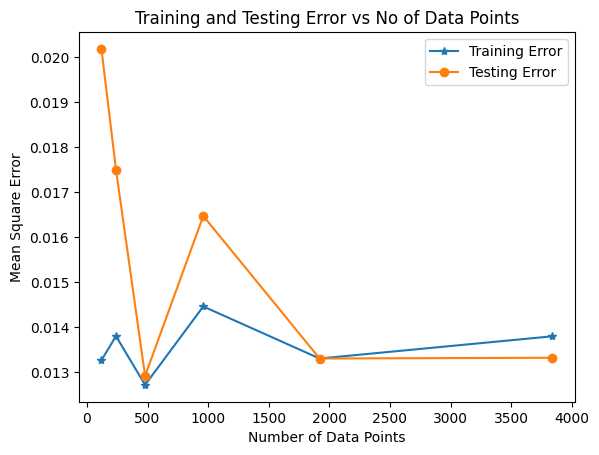

In [10]:
plt.subplot()
plt.plot(n,train_mse,marker='*',label='Training Error')
plt.plot(n,test_mse, marker='o',label = 'Testing Error')
plt.xlabel('Number of Data Points')
plt.ylabel('Mean Square Error')

plt.title("Training and Testing Error vs No of Data Points")
plt.legend()
plt.show()

## L2 Regularization

In [12]:
from tensorflow.keras.regularizers import l2
nodes = [2**i for i in range(5,10)]

def optimizing_nodes(i):
    tf.random.set_seed(42)
    model1 = Sequential()
    model1.add(Dense(nodes[i], activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
    model1.add(Dense(nodes[i], activation="relu", kernel_regularizer=l2(0.001),kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu",kernel_regularizer=l2(0.001),kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu", kernel_regularizer=l2(0.001),kernel_initializer=initalizer2))
    model1.add(Dense(nodes[i], activation="relu",kernel_regularizer=l2(0.001),kernel_initializer=initalizer2))
    model1.add(Dense(1, name='output'))


    # compile and train model
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
    history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)

    return model1

train_mse = []
test_mse = []

for i in range(len(nodes)):
    tf.keras.backend.clear_session()
    model1 = optimizing_nodes(i)  # Capture the returned model
    y_pred_train = np.array(model1.predict(X_train)).flatten()
    train_error = (y_train - y_pred_train)
    train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
    train_mse.append(train_mse1)
    print(train_mse1)

    y_pred_test = np.array(model1.predict(X_test)).flatten()
    test_error = (y_test - y_pred_test)
    test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
    test_mse.append(test_mse1)


Epoch 1/200
77/77 [==============================] - 4s 6ms/step - loss: 0.3908 - mean_absolute_percentage_error: 205.1440 - val_loss: 0.2419 - val_mean_absolute_percentage_error: 148.1471
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.2122 - mean_absolute_percentage_error: 114.6525 - val_loss: 0.1882 - val_mean_absolute_percentage_error: 229.8637
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1790 - mean_absolute_percentage_error: 120.2901 - val_loss: 0.1680 - val_mean_absolute_percentage_error: 138.8640
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1611 - mean_absolute_percentage_error: 110.4573 - val_loss: 0.1528 - val_mean_absolute_percentage_error: 136.2435
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1519 - mean_absolute_percentage_error: 125.6339 - val_loss: 0.1454 - val_mean_absolute_percentage_error: 268.6799
Epoch 6/200
77/77 [==============================] - 0s

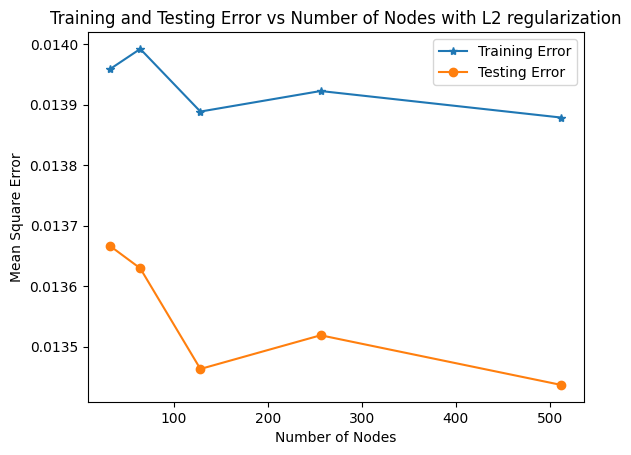

In [13]:
plt.subplot()
plt.plot(nodes,train_mse,marker='*',label='Training Error')
plt.plot(nodes,test_mse, marker='o',label = 'Testing Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Square Error')
#plt.xticks(range(0,10,1))
plt.title("Training and Testing Error vs Number of Nodes with L2 regularization")
plt.legend()
plt.show()

## Varying Learning rate

In [14]:
from tensorflow.keras.regularizers import l2
lr=[0.001,0.002,0.005,0.007,0.01,0.02]
x = np.linspace(0,1,600)            #input data
Y = np.sin(np.pi*x)   #Output data
random_numbers = np.random.uniform(-0.2, 0.2, 600)  #random noise
Y_noise = Y + random_numbers  #Noisy data
X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


def error_vs_L2regularizer(i):
    tf.random.set_seed(42)
    model1 = Sequential()
    model1.add(Dense(256, activation="relu", input_dim=1,kernel_regularizer=l2(0.001), name='hidden_1'))
    model1.add(Dense(256, activation="relu",kernel_regularizer=l2(0.001) ))
    model1.add(Dense(1, name='output'))

    # compile and train model
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr[i]), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
    history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)

    return model1

train_mse = []
test_mse = []

for i in range(len(lr)):
    tf.keras.backend.clear_session()
    model1 = error_vs_L2regularizer(i)  # Capture the returned model
    y_pred_train = np.array(model1.predict(X_train)).flatten()
    train_error = (y_train - y_pred_train)
    train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
    train_mse.append(train_mse1)
    print(train_mse1)

    y_pred_test = np.array(model1.predict(X_test)).flatten()
    test_error = (y_test - y_pred_test)
    test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
    test_mse.append(test_mse1)


Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 0.4885 - mean_absolute_percentage_error: 126.2132 - val_loss: 0.3824 - val_mean_absolute_percentage_error: 143.0596
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3516 - mean_absolute_percentage_error: 158.2468 - val_loss: 0.3174 - val_mean_absolute_percentage_error: 135.1915
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2838 - mean_absolute_percentage_error: 141.8638 - val_loss: 0.2665 - val_mean_absolute_percentage_error: 140.7303
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2374 - mean_absolute_percentage_error: 156.7329 - val_loss: 0.2195 - val_mean_absolute_percentage_error: 157.1843
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2002 - mean_absolute_percentage_error: 153.5274 - val_loss: 0.1878 - val_mean_absolute_percentage_error: 165.5125
Epoch 6/200
12/12 [==============================] - 0

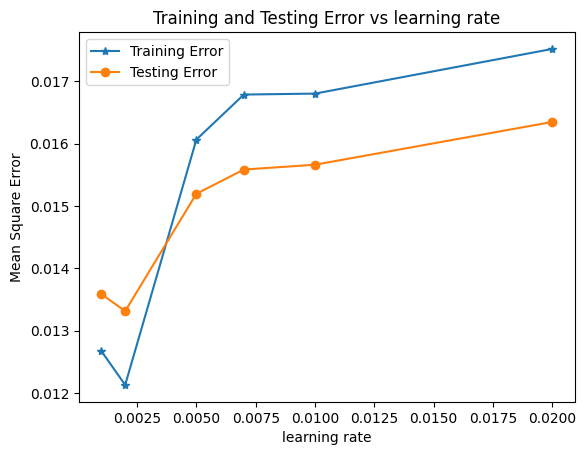

In [15]:
plt.subplot()
plt.plot(lr,train_mse,marker='*',label='Training Error')
plt.plot(lr,test_mse, marker='o',label = 'Testing Error')
plt.xlabel('learning rate')
plt.ylabel('Mean Square Error')
plt.title("Training and Testing Error vs learning rate")
plt.legend()
plt.show()

## Varying Layers


In [16]:
train_mse = []
test_mse = []

tf.random.set_seed(42)
tf.keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(256, activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model1.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model1.add(Dense(1, name='output'))

# compile and train model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model1.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model1.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)

# Model2 with 3 hidden layers

tf.random.set_seed(42)
tf.keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(256, activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model2.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model2.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model2.add(Dense(1, name='output'))

# compile and train model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model2.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model2.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)


# Model with 4 hidden layers
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model3 = Sequential()
model3.add(Dense(256, activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model3.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model3.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model3.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model3.add(Dense(1, name='output'))

# compile and train model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model3.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model3.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)

## Model with 5 hidden layers
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model4 = Sequential()
model4.add(Dense(256, activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model4.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model4.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model4.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model4.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model4.add(Dense(1, name='output'))

# compile and train model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model4.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model4.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)



Epoch 1/200
12/12 [==============================] - 2s 20ms/step - loss: 0.3657 - mean_absolute_percentage_error: 158.4606 - val_loss: 0.2576 - val_mean_absolute_percentage_error: 101.5570
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2384 - mean_absolute_percentage_error: 143.8300 - val_loss: 0.2328 - val_mean_absolute_percentage_error: 107.5885
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2334 - mean_absolute_percentage_error: 133.5962 - val_loss: 0.2264 - val_mean_absolute_percentage_error: 108.9759
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1551 - mean_absolute_percentage_error: 128.5730 - val_loss: 0.1613 - val_mean_absolute_percentage_error: 124.1737
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1311 - mean_absolute_percentage_error: 131.3242 - val_loss: 0.1272 - val_mean_absolute_percentage_error: 134.9244
Epoch 6/200
12/12 [==============================] - 0

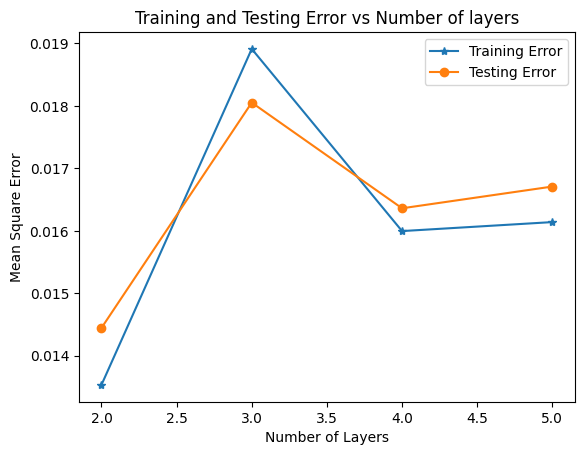

In [17]:
l = [2,3,4,5]
plt.subplot()
plt.plot(l,train_mse,marker='*',label='Training Error')
plt.plot(l,test_mse, marker='o',label = 'Testing Error')
plt.xlabel('Number of Layers')
plt.ylabel('Mean Square Error')

plt.title("Training and Testing Error vs Number of layers")
plt.legend()
plt.show()

## Models having different activation function

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU
train_mse = []
test_mse = []

tf.random.set_seed(42)
tf.keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(256, activation="relu", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model1.add(Dense(256, activation="relu", kernel_initializer=initalizer2))
model1.add(Dense(1, name='output'))

# compile and train model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model1.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model1.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)


# Model with Sigmoid activation function

tf.random.set_seed(42)
tf.keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(256, activation="sigmoid", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model2.add(Dense(256, activation="sigmoid", kernel_initializer=initalizer2))
model2.add(Dense(1, name='output'))

# compile and train model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model2.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model2.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)

# model with tanh activation function
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model3 = Sequential()
model3.add(Dense(256, activation="tanh", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model3.add(Dense(256, activation="tanh", kernel_initializer=initalizer2))
model3.add(Dense(1, name='output'))

# compile and train model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model3.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model3.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)


# model with softmax activation

tf.random.set_seed(42)
tf.keras.backend.clear_session()
model4 = Sequential()
model4.add(Dense(256, activation="softmax", input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model4.add(Dense(256, activation="softmax", kernel_initializer=initalizer2))
model4.add(Dense(1, name='output'))

# compile and train model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model4.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model4.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)


# Model with leaky relu


tf.random.set_seed(42)
tf.keras.backend.clear_session()
model5 = Sequential()
model5.add(Dense(256, activation=LeakyReLU(alpha=0.2), input_dim=1,kernel_initializer=initalizer2, name='hidden_1'))
model5.add(Dense(256, activation=LeakyReLU(alpha=0.2), kernel_initializer=initalizer2))
model5.add(Dense(1, name='output'))

# compile and train model
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


y_pred_train = np.array(model5.predict(X_train)).flatten()
train_error = (y_train - y_pred_train)
train_mse1 = (1 / len(X_train)) * np.dot(train_error.T, train_error)
train_mse.append(train_mse1)
print(train_mse1)

y_pred_test = np.array(model5.predict(X_test)).flatten()
test_error = (y_test - y_pred_test)
test_mse1 = (1 / len(X_test)) * np.dot(test_error.T, test_error)
test_mse.append(test_mse1)


Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 0.3981 - mean_absolute_percentage_error: 161.8531 - val_loss: 0.2793 - val_mean_absolute_percentage_error: 98.5854
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2372 - mean_absolute_percentage_error: 139.0361 - val_loss: 0.2689 - val_mean_absolute_percentage_error: 103.4321
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2453 - mean_absolute_percentage_error: 133.3701 - val_loss: 0.2445 - val_mean_absolute_percentage_error: 108.0523
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1655 - mean_absolute_percentage_error: 126.5665 - val_loss: 0.1353 - val_mean_absolute_percentage_error: 132.7006
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1243 - mean_absolute_percentage_error: 127.2537 - val_loss: 0.1196 - val_mean_absolute_percentage_error: 142.8190
Epoch 6/200
12/12 [==============================] - 0s

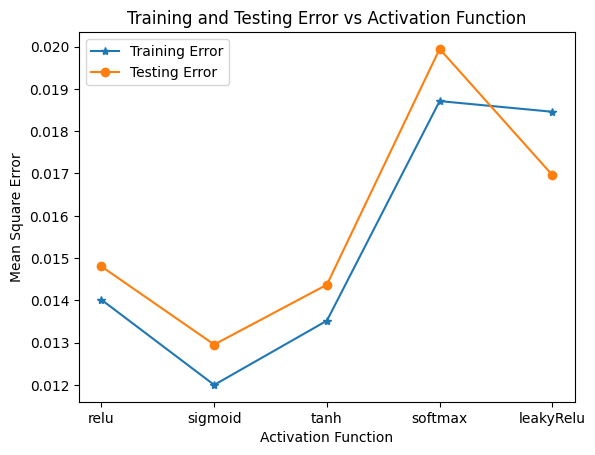

In [19]:
act = ['relu', 'sigmoid', 'tanh', 'softmax', 'leakyRelu']
plt.subplot()
plt.plot(act, train_mse, marker='*', label='Training Error')
plt.plot(act, test_mse, marker='o', label='Testing Error')
plt.xlabel('Activation Function')
plt.ylabel('Mean Square Error')
plt.title("Training and Testing Error vs Activation Function")
plt.legend()
plt.show()


# 2nd Function

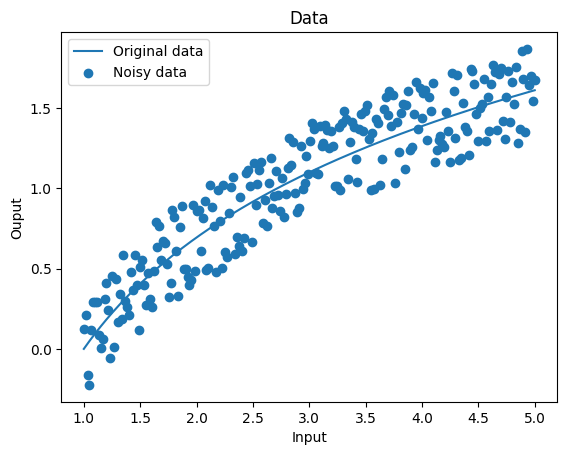

((144,), (96,), (144,), (96,))

In [20]:
n=240 # number of points
x = np.linspace(1,5,n)            #input data
Y = np.log(x)  #Output data
random_numbers = np.random.uniform(-0.3, 0.3, n)  #random noise
Y_noise = Y + random_numbers  #Noisy data

#plot original data and noisy data before  NN
plt.plot(x,Y, label='Original data')
plt.scatter(x,Y_noise,label='Noisy data')
plt.title('Data')
plt.ylabel('Ouput')
plt.xlabel('Input')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=1, name='hidden_1'))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, name='output'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=40)


Epoch 1/200
4/4 [==============================] - 1s 63ms/step - loss: 0.7938 - mean_absolute_percentage_error: 79.5443 - val_loss: 0.0486 - val_mean_absolute_percentage_error: 74.4859
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0873 - mean_absolute_percentage_error: 98.1911 - val_loss: 0.3063 - val_mean_absolute_percentage_error: 144.1677
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.2316 - mean_absolute_percentage_error: 125.2126 - val_loss: 0.2288 - val_mean_absolute_percentage_error: 131.1169
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1147 - mean_absolute_percentage_error: 100.0147 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 88.5866
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0501 - mean_absolute_percentage_error: 74.5274 - val_loss: 0.0509 - val_mean_absolute_percentage_error: 70.7036
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - 

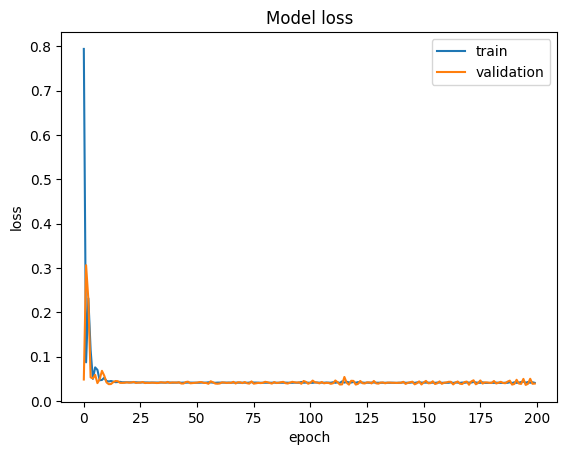

In [22]:
#plotting training history of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.xlim([100,300])
#plt.ylim([-.02,.02])
plt.show()

3/3 [==============================] - 0s 3ms/step


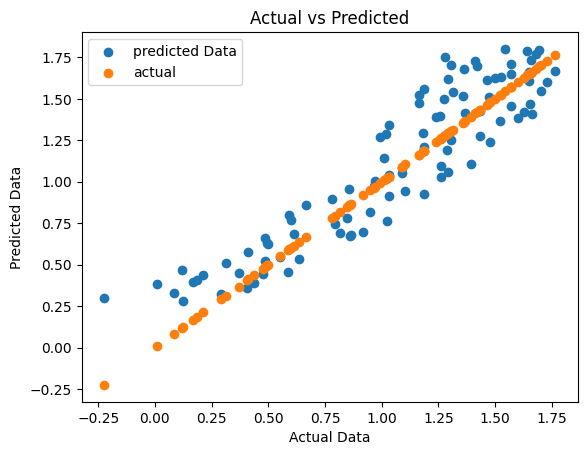

In [23]:
ytest_p = model.predict(X_test)
plt.scatter(y_test,ytest_p, label='predicted Data')
plt.scatter(y_test,y_test, label='actual')
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()